# Clustering (K-Means, DP-Means)

In this project I will implement K-Means algorithm on simple Gaussian data from scratch (without using the built-in scikit-learn method ofr k-means). The goal is to get a deep understanding of how this widely-used algorithm works and get a sensibility of how variations in the parameters affect the speed and quality of the model.

The second part of the project implements DP-means, which is a clustering algorithm that is sililar to K-means but adds the parameter 𝜆.  The purpose of the  𝜆  parameter is to penalize the number of clusters that gets formed in the algorithm. DP-means tries to minimize the distance from the data points to their respective cluster means, therefore without this parameter the number of clusters k would equal the number of data points. By adding the term  𝜆*k in the objective function, we ensure that the algorithm does not assign their own individual cluster to each observation, but rather gives you clusters of different sizes.
    

**(a)** Generate $3$ $2$D Gaussian clusters of data with the following means and covariances:

$\boldsymbol{\mu}_1 = [2,2]^T, \boldsymbol{\mu}_2 = [-2,2]^T, \boldsymbol{\mu}_3 = [0,-2]^T$,

$\Sigma_1 = [[0.02,0];[0,0.02]]$, $\Sigma_2 = [[0.2,0];[0,0.2]]$, $\Sigma_3 = [[0.05,0];[0,0.05]]$ 

Let each cluster of data have $50$ points. Plot the generated Gaussian data.

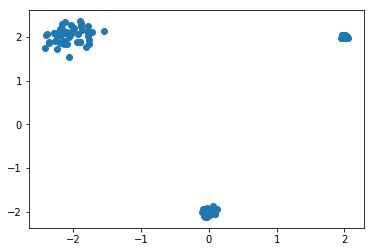

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# Generate 2D Gaussian Data with 3 clusters of 3 different means
# Create array that will hold all data points
data = np.ones((150, 2))

# Create cluster 1
for i in range(50):
    x = random.gauss(2, 0.02)
    y = random.gauss(2, 0.02)
    data[i][0] = x
    data[i][1] = y

# Create cluster 2
for j in range(50,100):
    x = random.gauss(-2, 0.2)
    y = random.gauss(2, 0.2)
    data[j][0] = x
    data[j][1] = y

# Create cluster 3
for k in range(100, 150):
    x = random.gauss(0, 0.05)
    y = random.gauss(-2, 0.05)
    data[k][0] = x
    data[k][1] = y
    
# Plotting
# Write code here:
x_coordinates = data[:,0]
y_coordinates = data[:,1]
plt.scatter(x_coordinates, y_coordinates)
plt.show()


**(b)** Implement K-Means and apply it to the Gaussian data above.

Plot the created clusters per iteration in different colors. For convergence of the algorithm (stopping criterion), check whether the derived cluster means become stationary (don't change over iterations).  

Iteration:  1


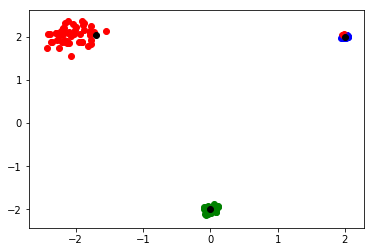

Iteration:  2


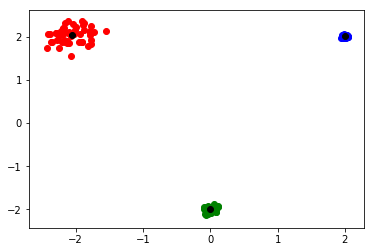

In [12]:
## K-Means implementation:

num_clusters = 3

### Randomly initialize 3 means: ###

means_x = np.random.uniform(-2,2,num_clusters).reshape(num_clusters,1)
means_y = np.random.uniform(-2,2,num_clusters).reshape(num_clusters,1)
# means = np.random.uniform(-2,2, size=(num_clusters, 2))

##############################################

# initializations
labels = np.ones((data.shape[0],1))
converged = 0
iteration = 0
convergence_threshold = 0.001
while (converged==0):
    
    iteration += 1
    print('Iteration: ', iteration)
    
    ### Assignment Step - Assign each data observation to the cluster with the nearest mean: ###
    
    for i in range(data.shape[0]):
        distance_a = math.sqrt((data[i][0] - means_x[0])**2 + (data[i][1] - means_y[0])**2)
        distance_b = math.sqrt((data[i][0] - means_x[1])**2 + (data[i][1] - means_y[1])**2)
        distance_c = math.sqrt((data[i][0] - means_x[2])**2 + (data[i][1] - means_y[2])**2)
        distances = np.array([[distance_a], [distance_b], [distance_c]])
        
        labels[i] = np.argmin(distances)
    
    ###################################################################
    
    
    ### Mean Updating - Update the cluster means ###
    
    new_means_x = np.zeros(means_x.shape).reshape(num_clusters,1)    # initialize to 0 for calculating the average
    new_means_y = np.zeros(means_y.shape).reshape(num_clusters,1)
    num_samples = np.zeros((num_clusters,1)).reshape(num_clusters,1)

    for i in range(data.shape[0]):
        new_means_x[int(labels[i])] += data[i][0]
        new_means_y[int(labels[i])] += data[i][1]
        num_samples[int(labels[i])] += 1
    
    new_means_x = new_means_x / num_samples
    new_means_y = new_means_y / num_samples
        
    ###########################################################
    
    ### Check for convergence ###

    if ((np.sum(new_means_x - means_x) + np.sum(new_means_y - means_y)) < convergence_threshold):
        converged = 1
    
    means_x = new_means_x
    means_y = new_means_y
    
    #############################################################
    
    ### Plot clustering results after each iteration: ###
    
    for i in range(data.shape[0]):
        if (labels[i] == 0):
            plt.scatter(data[i][0], data[i][1], color='red', zorder=3)
        if (labels[i] == 1):
            plt.scatter(data[i][0], data[i][1], color='green', zorder=3)
        if (labels[i] == 2):
            plt.scatter(data[i][0], data[i][1], color='blue', zorder=3)  
    
    plt.scatter(means_x, means_y, color='black', zorder=5)
    plt.show()

    ###################################################################


**Problem 2: DP Means**

Implement DP-Means and test it out on National Basketball Association (NBA) data from the 2018-2019 season.

**(b)** Read in the NBA data from the ''NBA_stats_2018_2019.xlsx'' file and plot the Minutes Per Game (MPG) vs Points Per Game (PPG) statistics for all NBA players (a player is represented by a row of the data).  

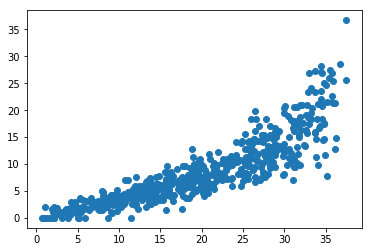

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import pandas as pd
import math


################################
## Load data from spreadsheet ##
################################

NBA_df = pd.io.excel.read_excel("NBA_stats_2018_2019.xlsx", sheet_name=0)

############################
## Plot data - MPG vs PPG ##
############################


X = NBA_df["MPG"].values.reshape(-1,1)
Y = NBA_df["PPG"].values.reshape(-1,1)
plt.scatter(X, Y)
plt.show()


**(c)** Implement DP-Means and apply it to the $2$D (MPG, PPG) NBA data obtained above.

Plot the created clusters per iteration in different colors. For convergence of the algorithm (stopping criterion), check whether the derived cluster means become stationary (don't change over iterations) and the number of existing clusters also stays the same.  

Current iteration:  1


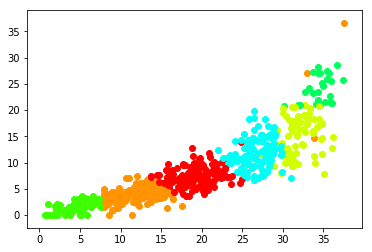

Current iteration:  2


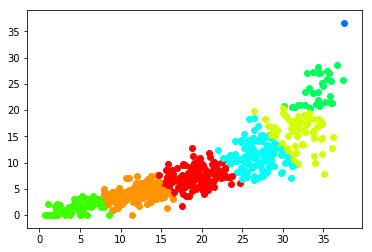

Number of clusters K = 7


In [16]:
## DP-Means Implementation: ##

# Parameter Initializations
lambda_example0 = 8
convergence_threshold = 1

def DPMeans (LAMBDA):
    ### DP Means - Initializations for algorithm ###
    # cluster count
    K = 1
    old_K = 0

    # sets of points that make up clusters
    num_points = X.shape[0]
    L = []
    L.append(list(range(num_points)))

    # Class indicators/labels
    Z = np.zeros((num_points,1))

    # means
    data_matrix = np.concatenate((X, Y), axis=1)
    MU = []
    old_MU = []
    MU.append(np.mean(data_matrix,axis=0))

    ################################################

    # Initializations for algorithm:
    converged = 0
    t = 0
    while converged == 0:
        t += 1
        print('Current iteration: ', t)

        ## Per Data Point: ##
        for i in np.arange(num_points): 

            ### Calculate distance from current point to all currently existing clusters ###
            distances = []
            for j in range(len(MU)):
                d = math.sqrt((MU[j][0] - data_matrix[i][0])**2 + (MU[j][1] - data_matrix[i][1])**2)
                distances.append(d)

            #########################################################################################


            ### Look at how the min distance of the cluster distance list compares to LAMBDA ###

            if (min(distances) > LAMBDA):

                # increase the number of clusters
                K += 1

                # update the label of the point to indicate the new cluster
                Z[i] += 1 

                # remove point from previous cluster
                for l in L:
                    if i in l:
                        l.remove(i)
                        break

                # make new cluster solely consisting on the new point
                L.append([i])

                # update the mean of the new cluster to be the new point (because size=1)
                MU.append(data_matrix[i,:])


            else:   # assign point to the closest cluster

                # update the label of the point to indicate the assigned cluster
                new_cluster_index = np.argmin(distances)
                Z[i] = new_cluster_index

                # remove point from previous cluster
                for l in L:
                    if i in l:
                        l.remove(i)
                        break            

                # insert point in assigned cluster
                L[new_cluster_index].append(i)

            #############################################################################################

        ### Form new sets of points (clusters) ###

        # Note: I incorporated this step (update list L) above

        ##################################################################

        ### Recompute means per cluster ###


        MU = []

        for l in L:
            sum_x = 0
            sum_y = 0
            n = 0
            for d in l:
                sum_x += data_matrix[d,0]
                sum_y += data_matrix[d,1]
                n += 1
            MU.append([(sum_x/n), (sum_y/n)])

        ####################################################

        ### Plot clustered data per iteration ###
        
        # Note: Two clusters may end up with the same color when the number of clusters is large even though
        # they are classified separately in the algorithm due to matplotlib coloring settings

        for p in range(data_matrix.shape[0]):
            plt.scatter(data_matrix[p][0], data_matrix[p][1], color=cm.hsv((Z[p]*0.1)))
        plt.show()

        ##########################################################

        ### Test for convergence: number of clusters doesn't change and means stay the same ###

        if ((old_K == K) and ((np.sum(MU) - np.sum(old_MU)) < convergence_threshold)):
            converged = 1       
        else:
            converged = 0

        ####################################################

        old_K = K
        old_MU = MU

    print("Number of clusters K =", K)


DPMeans(lambda_example0)

**(d)** Run the DP-Means code created above for the following $\lambda$ values:

$\underline{\lambda} = [4,10,14,24]$.

 Plot the resulting clusters for each $\lambda$ value and discuss the results.   

LAMBDA: 4 


Current iteration:  1


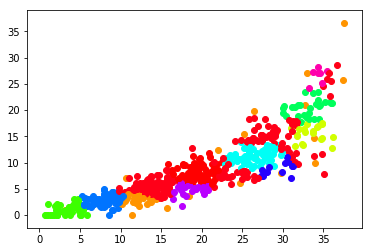

Current iteration:  2


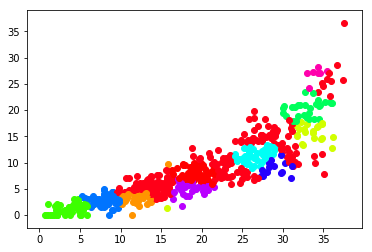

Current iteration:  3


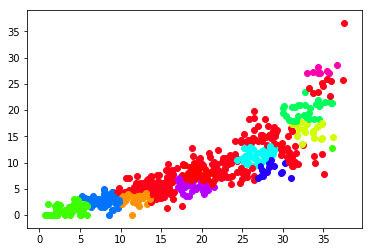

Current iteration:  4


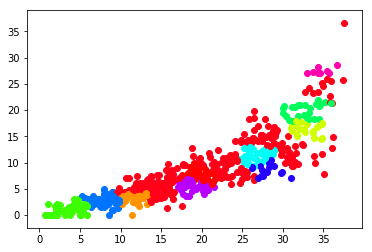

Number of clusters K = 24
LAMBDA: 10 


Current iteration:  1


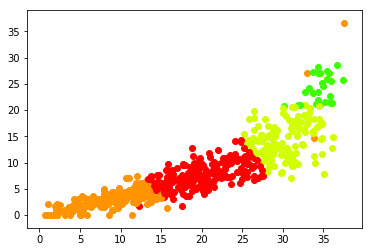

Current iteration:  2


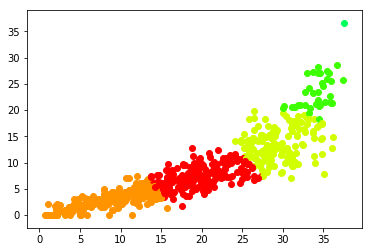

Number of clusters K = 5
LAMBDA: 14 


Current iteration:  1


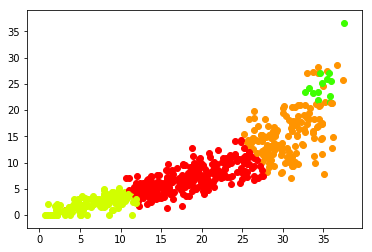

Current iteration:  2


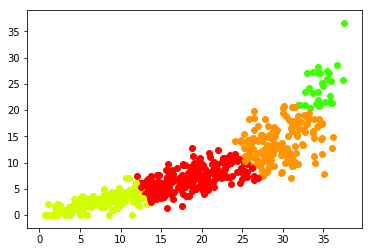

Number of clusters K = 4
LAMBDA: 24 


Current iteration:  1


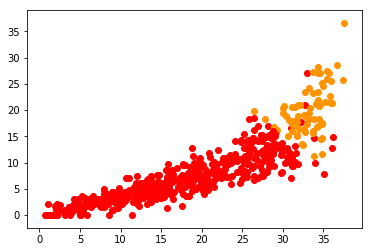

Current iteration:  2


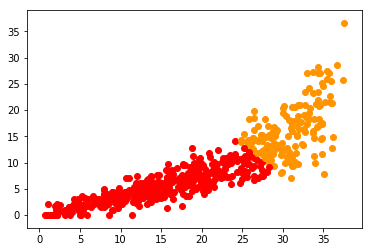

Number of clusters K = 2


In [15]:
# Plotting of results for different lambdas:

print('LAMBDA: 4','\n\n')
##############
# Lambda - 4##
##############

DPMeans(4)

print('LAMBDA: 10','\n\n')
##############
# Lambda - 10#
##############

DPMeans(10)

print('LAMBDA: 14','\n\n')
##############
# Lambda - 14#
##############

DPMeans(14)

print('LAMBDA: 24','\n\n')
##############
# Lambda - 24#
##############

DPMeans(24)




## Discussion of Results

As expected, as $\lambda$ increases, the number of clusters decreases because more weight is put on the penalty term for the higher number of clusters in the objective function. From the perspective of the algorithm, a new cluster will only be created when the minimum distance between any existing cluster mean and the data point is lower than $\lambda$. This means that the higher the $\lambda$, the less likely a new cluster will be formed because the more likely you will encounter another cluster to join in your surroundings.